# Gender Inequality Index Analysis

**International Womens Day 2025 Mini Project**

_[Data](https://hdr.undp.org/data-center/thematic-composite-indices/gender-inequality-index#/indicies/GII)_

In [31]:
import pandas as pd # For data frame management
import os # For file management
import matplotlib.pyplot as plt # for data visualisation
import numpy as np # For numerical calculations - e.g. claculating trend line values for our scatter graphs
import statsmodels.api as sm

In [32]:
# Check current working area
os.getcwd()

'C:\\Users\\vicks\\Documents'

In [33]:
# Setting the working directory to the folder we saved the data
os.chdir('C:\\Users\\vicks\\Documents')

In [34]:
# Read in GII Data
GII_Data = pd.read_csv('GII.csv')

In [35]:
# Visual check read in is as expected
GII_Data.head()

,HDI rank,Country,Gender Inequality Index Value,Gender Inequality Index Rank,"Maternal mortality ratio (deaths per 100,000 live births)","Adolescent birth rate (births per 1,000 women ages 15–19)",Share of seats in parliament (% held by women),Population with at least some secondary education Female,Population with at least some secondary education Male,Labour force participation rate Female,Labour force participation rate Male
0,1.0,Switzerland,0.018,3,7,2.2,39.0,96.9,97.5,61.5,71.9
1,2.0,Norway,0.012,2,2,2.2,45.0,99.1,99.3,62.5,69.6
2,3.0,Iceland,0.039,9,3,5.1,47.6,99.8,99.7,70.7,78.3
3,4.0,"Hong Kong, China (SAR)",..,..,..,1.6,..,77.9,84.1,52.9,64.7
4,5.0,Denmark,0.009,1,5,1.8,43.6,95.1,95.2,59.4,67.4


### General Data Cleaning

In [36]:
# Remove 'blank' values currently represented in the data as "..""
GII_Data = GII_Data.applymap(lambda x: x.replace('..','') if isinstance(x, str) else x)

In [37]:
# Visual Check to see if it worked
GII_Data

,HDI rank,Country,Gender Inequality Index Value,Gender Inequality Index Rank,"Maternal mortality ratio (deaths per 100,000 live births)","Adolescent birth rate (births per 1,000 women ages 15–19)",Share of seats in parliament (% held by women),Population with at least some secondary education Female,Population with at least some secondary education Male,Labour force participation rate Female,Labour force participation rate Male
0,1.0,Switzerland,0.018,3,7,2.2,39.0,96.9,97.5,61.5,71.9
1,2.0,Norway,0.012,2,2,2.2,45.0,99.1,99.3,62.5,69.6
2,3.0,Iceland,0.039,9,3,5.1,47.6,99.8,99.7,70.7,78.3
3,4.0,"Hong Kong, China (SAR)",,,,1.6,,77.9,84.1,52.9,64.7
4,5.0,Denmark,0.009,1,5,1.8,43.6,95.1,95.2,59.4,67.4
...,...,...,...,...,...,...,...,...,...,...,...
191,192.0,South Sudan,,,"1,223",97.4,32.3,26.5,36.4,,
192,193.0,Somalia,0.674,164,621,116.1,20.7,4.4,17.8,22.3,49.3
193,NaN,Korea (Democratic People's Rep. of),,,107,2.4,17.6,,,,
194,NaN,Monaco,,,,6.9,33.3,,,39.5,56.6


### Visualisation

_(Useful for data exploration)_

**Scatter Graph showing relationship between each variable and the GI Index value**

(To be used later in a statistial test such as linear regression)

In [38]:
# Define X Variable - saves typing effort for repetition in graph creation
x = GII_Data['Gender Inequality Index Value']

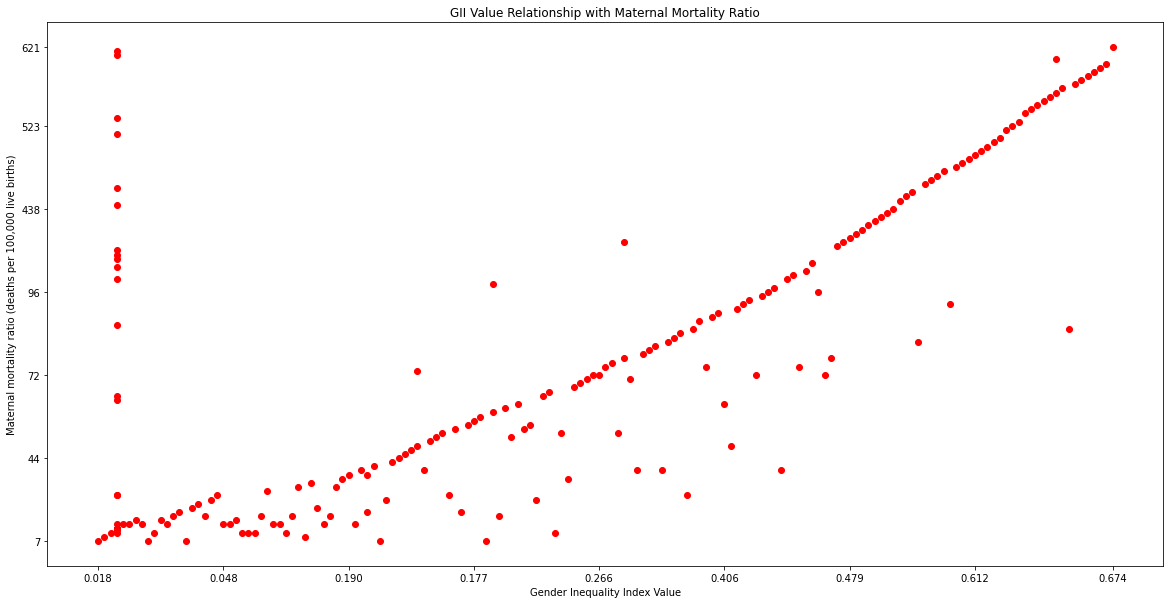

In [39]:
# Maternal mortality ratio (deaths per 100,000 live births) vs Index Value
y = GII_Data['Maternal mortality ratio (deaths per 100,000 live births)']

# Set Figsize
plt.figure(figsize=(20,10))

# Create Basic Plot
plt.scatter(x, y, color='red', marker='o')

# Customise x-axis ticks for better viewership
plt.xticks([0,20,40,60,80,100,120,140,162])

# Customise x-axis ticks for better viewership
plt.yticks([0,20,40,60,80,100,119])

# Add Labels
plt.xlabel('Gender Inequality Index Value')
plt.ylabel('Maternal mortality ratio (deaths per 100,000 live births)')
plt.title('GII Value Relationship with Maternal Mortality Ratio')

# View Plot
plt.show()

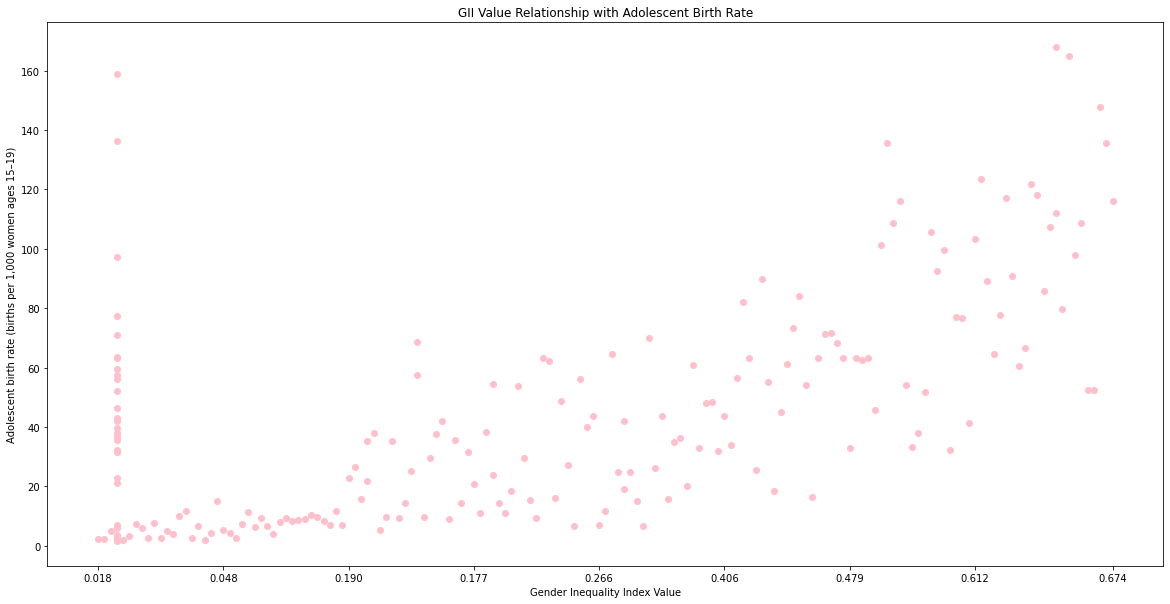

In [40]:
# Maternal mortality ratio (deaths per 100,000 live births) vs Index Value
y = GII_Data['Adolescent birth rate (births per 1,000 women ages 15–19)']

# Set Figsize
plt.figure(figsize=(20,10))

# Create Basic Plot
plt.scatter(x, y, color='pink', marker='o')

# Customise x-axis ticks for better viewership
plt.xticks([0,20,40,60,80,100,120,140,162])

# Customise x-axis ticks for better viewership
plt.yticks([0,20,40,60,80,100,120,140,160])

# Add Labels
plt.xlabel('Gender Inequality Index Value')
plt.ylabel('Adolescent birth rate (births per 1,000 women ages 15–19)')
plt.title('GII Value Relationship with Adolescent Birth Rate')

# View Plot
plt.show()

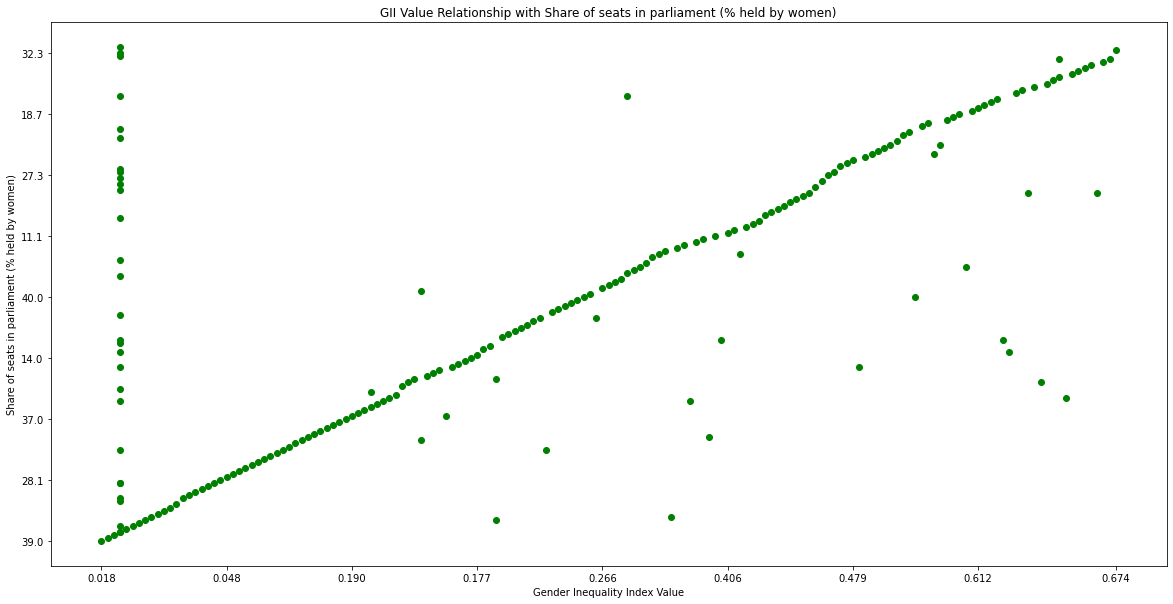

In [41]:
# Share of seats in parliament (% held by women) vs Index Value
y = GII_Data['Share of seats in parliament (% held by women)']

# Set Figsize
plt.figure(figsize=(20,10))

# Create Basic Plot
plt.scatter(x, y, color='green', marker='o')

# Customise x-axis ticks for better viewership
plt.xticks([0,20,40,60,80,100,120,140,162])

# Customise x-axis ticks for better viewership
plt.yticks([0,20,40,60,80,100,120,140,160])

# Add Labels
plt.xlabel('Gender Inequality Index Value')
plt.ylabel('Share of seats in parliament (% held by women)')
plt.title('GII Value Relationship with Share of seats in parliament (% held by women)')

# View Plot
plt.show()

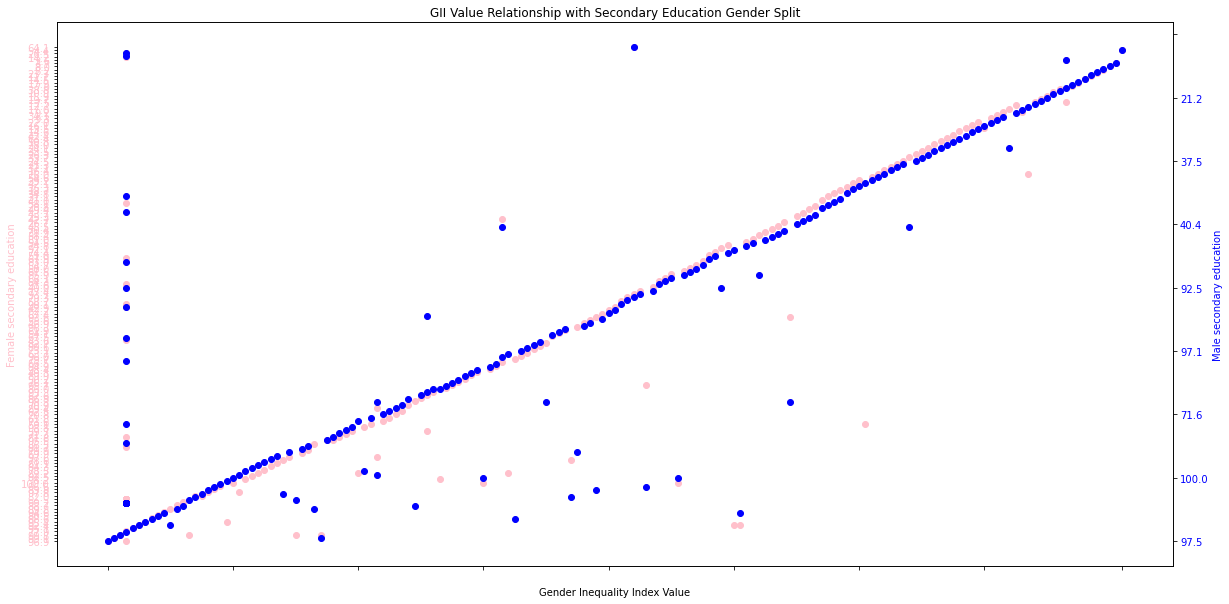

In [42]:
# Secondary Education Comparison  vs Index Value
y1 = GII_Data['Population with at least some secondary education Female']
y2 = GII_Data['Population with at least some secondary education Male']

# Set Figsize
fig, ax1 = plt.subplots(figsize=(20,10))

# Create Basic Plot (Female secondary education)
ax1.scatter(x, y1, color='pink', label='Female', marker='o')

# Add Labels
ax1.set_xlabel('Gender Inequality Index Value')
ax1.set_ylabel('Female secondary education', color='pink')
ax1.tick_params(axis='y', labelcolor='pink')

# Create Basic Plot (Male secondary education)
ax2= ax1.twinx() # Creates a second Y axis on the right
ax2.scatter(x, y2, color='blue', label='Male', marker='o')

# Add Labels
# ax2.xlabel('Gender Inequality Index Value')
ax2.set_ylabel('Male secondary education', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# # Customise x-axis ticks for better viewership
ax1.tick_params(axis='x', labelcolor='white')
plt.xticks([0,20,40,60,80,100,120,140,162])

# # Customise x-axis ticks for better viewership
plt.yticks([0,20,40,60,80,100,120,140,160])

plt.title('GII Value Relationship with Secondary Education Gender Split')

# View Plot
plt.show()

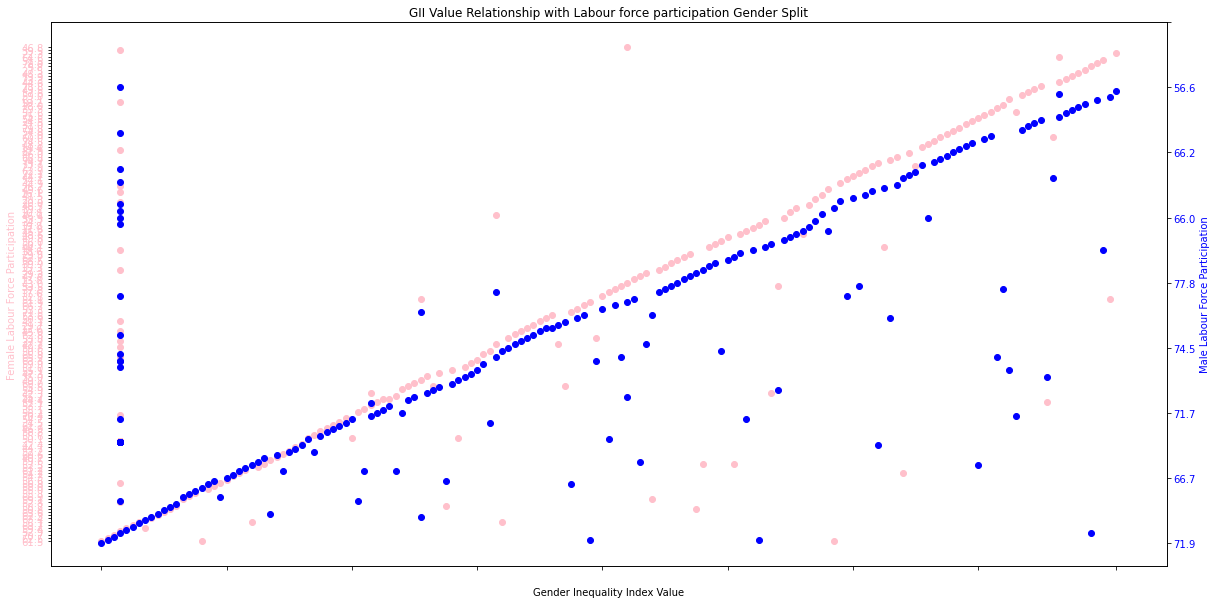

In [43]:
# Labour force participation rate vs Index Value
y1 = GII_Data['Labour force participation rate Female']
y2 = GII_Data.iloc[:,10]

# Set Figsize
fig, ax1 = plt.subplots(figsize=(20,10))

# Create Basic Plot (Labour force participation)
ax1.scatter(x, y1, color='pink', label='Female', marker='o')

# Add Labels
ax1.set_xlabel('Gender Inequality Index Value')
ax1.set_ylabel('Female Labour Force Participation', color='pink')
ax1.tick_params(axis='y', labelcolor='pink')

# Create Basic Plot (Labour force participation)
ax2= ax1.twinx() # Creates a second Y axis on the right
ax2.scatter(x, y2, color='blue', label='Male', marker='o')

# Add Labels
# ax2.xlabel('Gender Inequality Index Value')
ax2.set_ylabel('Male Labour Force Participation', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# # Customise x-axis ticks for better viewership
ax1.tick_params(axis='x', labelcolor='white')
plt.xticks([0,20,40,60,80,100,120,140,162])

# # Customise x-axis ticks for better viewership
plt.yticks([0,20,40,60,80,100,120,140,160])

plt.title('GII Value Relationship with Labour force participation Gender Split')

# View Plot
plt.show()

### Linear Regression for Statistical Proof of Relationships and their strength

#### 

In [44]:
# Define Independent Variable (X) and Dependnt Variable (Y)

X = x
y1 = GII_Data['Maternal mortality ratio (deaths per 100,000 live births)']
y2 = GII_Data['Adolescent birth rate (births per 1,000 women ages 15–19)']
y3 = GII_Data['Share of seats in parliament (% held by women)']
y4 = GII_Data['Population with at least some secondary education Female']
y5 = GII_Data['Population with at least some secondary education Male']
y6 = GII_Data['Labour force participation rate Female']
y7 = GII_Data.iloc[:,10]

In [45]:
# Add a constant for the intercept
X_with_const = sm.add_constant(X)

In [46]:
# Replace blank values with nan
X_with_const = X_with_const.replace('', np.nan)
y1 = y1.replace('', np.nan)
y2 = y2.replace('', np.nan)
y3 = y3.replace('', np.nan)
y4 = y4.replace('', np.nan)
y5 = y5.replace('', np.nan)
y6 = y6.replace('', np.nan)
y7 = y7.replace('', np.nan)

# Force values to numeric
X_with_const = X_with_const.apply(pd.to_numeric, errors='coerce')
y1 = pd.to_numeric(y1, errors='coerce')
y2 = pd.to_numeric(y2, errors='coerce')
y3 = pd.to_numeric(y3, errors='coerce')
y4 = pd.to_numeric(y4, errors='coerce')
y5 = pd.to_numeric(y5, errors='coerce')
y6 = pd.to_numeric(y6, errors='coerce')
y7 = pd.to_numeric(y7, errors='coerce')

# Check proportion of nan vals
print(X_with_const.isna().sum())
print(y1.isna().sum())
print(y2.isna().sum())
print(y3.isna().sum())
print(y4.isna().sum())
print(y5.isna().sum())
print(y6.isna().sum())
print(y7.isna().sum())

const                             0
Gender Inequality Index Value    29
dtype: int64
14
0
2
17
17
12
12


In [47]:
# Replace nan vals with mean
X_with_const = X_with_const.fillna(X_with_const.mean())
y1 = y1.fillna(y1.mean())
y2 = y2.fillna(y2.mean())
y3 = y3.fillna(y3.mean())
y4 = y4.fillna(y4.mean())
y5 = y5.fillna(y5.mean())
y6 = y6.fillna(y6.mean())
y7 = y7.fillna(y7.mean())

#### Maternal mortality ratio

In [48]:
# Create and fit the model
model1 = sm.OLS(y1, X_with_const).fit()

# View results
print(model1.summary())

                                                OLS Regression Results                                               
Dep. Variable:     Maternal mortality ratio (deaths per 100,000 live births)   R-squared:                       0.514
Model:                                                                   OLS   Adj. R-squared:                  0.511
Method:                                                        Least Squares   F-statistic:                     204.8
Date:                                                       Sun, 09 Mar 2025   Prob (F-statistic):           3.47e-32
Time:                                                               00:50:14   Log-Likelihood:                -1205.8
No. Observations:                                                        196   AIC:                             2416.
Df Residuals:                                                            194   BIC:                             2422.
Df Model:                                               

#### Adolescent birth rate

In [49]:
# Create and fit the model
model2 = sm.OLS(y2, X_with_const).fit()

# View results
print(model2.summary())

                                                OLS Regression Results                                               
Dep. Variable:     Adolescent birth rate (births per 1,000 women ages 15–19)   R-squared:                       0.572
Model:                                                                   OLS   Adj. R-squared:                  0.570
Method:                                                        Least Squares   F-statistic:                     259.5
Date:                                                       Sun, 09 Mar 2025   Prob (F-statistic):           1.27e-37
Time:                                                               00:50:14   Log-Likelihood:                -906.24
No. Observations:                                                        196   AIC:                             1816.
Df Residuals:                                                            194   BIC:                             1823.
Df Model:                                               

#### Share of seats in parliament (% held by women)

In [50]:
# Create and fit the model
model3 = sm.OLS(y3, X_with_const).fit()

# View results
print(model3.summary())

                                          OLS Regression Results                                          
Dep. Variable:     Share of seats in parliament (% held by women)   R-squared:                       0.144
Model:                                                        OLS   Adj. R-squared:                  0.139
Method:                                             Least Squares   F-statistic:                     32.56
Date:                                            Sun, 09 Mar 2025   Prob (F-statistic):           4.28e-08
Time:                                                    00:51:05   Log-Likelihood:                -751.53
No. Observations:                                             196   AIC:                             1507.
Df Residuals:                                                 194   BIC:                             1514.
Df Model:                                                       1                                         
Covariance Type:                     

#### Population with at least some secondary education Female

In [51]:
# Create and fit the model
model4 = sm.OLS(y4, X_with_const).fit()

# View results
print(model4.summary())

                                               OLS Regression Results                                               
Dep. Variable:     Population with at least some secondary education Female   R-squared:                       0.624
Model:                                                                  OLS   Adj. R-squared:                  0.622
Method:                                                       Least Squares   F-statistic:                     322.5
Date:                                                      Sun, 09 Mar 2025   Prob (F-statistic):           4.02e-43
Time:                                                              00:51:40   Log-Likelihood:                -843.18
No. Observations:                                                       196   AIC:                             1690.
Df Residuals:                                                           194   BIC:                             1697.
Df Model:                                                       

#### Population with at least some secondary education Male

In [52]:
# Create and fit the model
model5 = sm.OLS(y5, X_with_const).fit()

# View results
print(model5.summary())

                                              OLS Regression Results                                              
Dep. Variable:     Population with at least some secondary education Male   R-squared:                       0.594
Model:                                                                OLS   Adj. R-squared:                  0.592
Method:                                                     Least Squares   F-statistic:                     283.9
Date:                                                    Sun, 09 Mar 2025   Prob (F-statistic):           7.82e-40
Time:                                                            00:53:18   Log-Likelihood:                -828.27
No. Observations:                                                     196   AIC:                             1661.
Df Residuals:                                                         194   BIC:                             1667.
Df Model:                                                               1       

#### Labour force participation rate Female

In [53]:
# Create and fit the model
model6 = sm.OLS(y6, X_with_const).fit()

# View results
print(model6.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Labour force participation rate Female   R-squared:                       0.044
Model:                                                OLS   Adj. R-squared:                  0.039
Method:                                     Least Squares   F-statistic:                     9.013
Date:                                    Sun, 09 Mar 2025   Prob (F-statistic):            0.00303
Time:                                            00:53:51   Log-Likelihood:                -798.85
No. Observations:                                     196   AIC:                             1602.
Df Residuals:                                         194   BIC:                             1608.
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

#### Labour force participation rate  Male

In [54]:
# Create and fit the model
model7 = sm.OLS(y7, X_with_const).fit()

# View results
print(model7.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Labour force participation rate  Male   R-squared:                       0.002
Model:                                               OLS   Adj. R-squared:                 -0.004
Method:                                    Least Squares   F-statistic:                    0.3191
Date:                                   Sun, 09 Mar 2025   Prob (F-statistic):              0.573
Time:                                           00:54:26   Log-Likelihood:                -727.73
No. Observations:                                    196   AIC:                             1459.
Df Residuals:                                        194   BIC:                             1466.
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    